<a href="https://colab.research.google.com/github/Tkokotaj/Test/blob/master/623Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUTHOR: Timothy Kokotajlo, 6/8/2021

DISCLAIMERS: 

In [4]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3MB 37.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as col

import matplotlib.patches as mpatches

from IPython.display import Markdown as md
from IPython.display import display, Math, Latex

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve


# Upload Dataset

In [116]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['testdata.csv']))


Saving testdata.csv to testdata (9).csv


In [51]:
#turns out PD already did this for me

#new_header = dfTemp.iloc[0] #grab the first row for the header
#df = dfTemp[1:] #take the data less the header row
#df.columns = new_header #set the header row as the df header

In [117]:
print(df.shape)
print(df.columns[1])
print(df.head)

(226, 38)
Player_Name
<bound method NDFrame.head of      Win  Player_Name        gameID  ...  total_obj  total_IP  total_geos
0      0            0  2.091120e+16  ...          8        46          18
1      1            1  2.091120e+16  ...          9        83          27
2      0            0  3.430660e+16  ...          9        49          14
3      1            1  3.430660e+16  ...          7        79          27
4      0            0  7.003450e+16  ...          9        70          16
..   ...          ...           ...  ...        ...       ...         ...
221    1            1  9.626650e+17  ...          6        99          31
222    0            0  9.796520e+17  ...          8        54          19
223    1            1  9.796520e+17  ...          8       100          28
224    1            0  9.935090e+17  ...         11        87          17
225    0            1  9.935090e+17  ...          6        55          30

[226 rows x 38 columns]>


In [118]:
from sklearn.model_selection import train_test_split
y = df['Player_Name']
X = df.drop(['Player_Name'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [119]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (151, 37)
y_train: (151,)
X_test: (75, 37)
y_test: (75,)


# Analyze Dataset

0


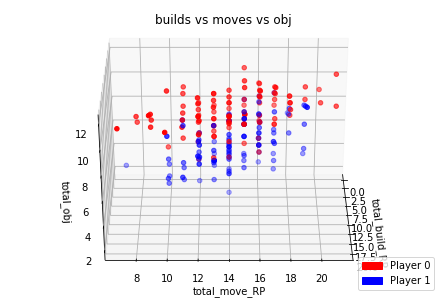

72


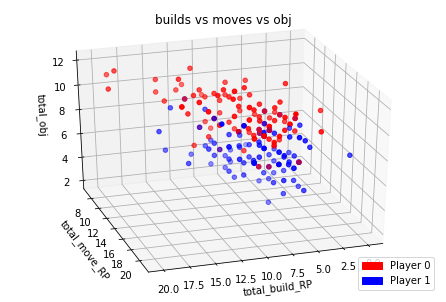

144


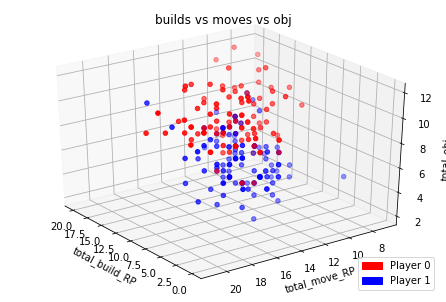

216


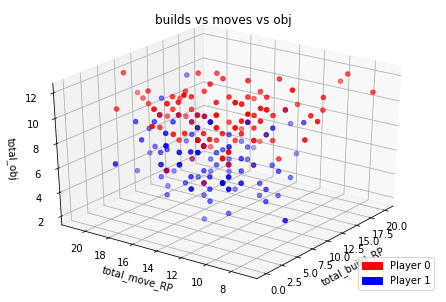

288


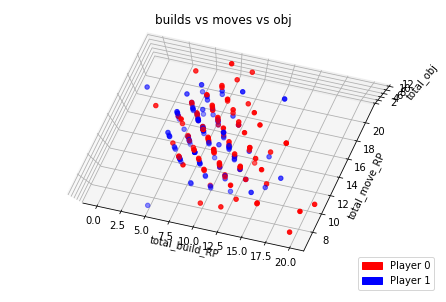

In [174]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
numAngles = 5
for i in range(0, 360, (int(360/numAngles))):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors=['red', 'blue']
    #plt.scatter(df['total_build_RP'], df['total_move_RP'], c=df['Player_Name'], cmap=col.ListedColormap(colors))
    ax.scatter(df['total_build_RP'], df['total_move_RP'],df['total_obj'], c=df['Player_Name'], cmap=col.ListedColormap(colors))
    classA = mpatches.Patch(color='red', label='Player 0')
    classB = mpatches.Patch(color='blue', label='Player 1')
    plt.legend(handles=[classA, classB], loc='lower right')
    plt.xlabel('total_build_RP')
    plt.ylabel('total_move_RP')
    ax.set_zlabel('total_obj')
    #plt.zlabel('total_obj')
    plt.title('builds vs moves vs obj')
    #plt.title('builds vs moves')
    #plt.tight_layout()
    ax.view_init(None, i)
    print(i)
    if (i==360-(int(360/numAngles))):
      ax.view_init(85, i)
      plt.show()
    else:
      plt.show()


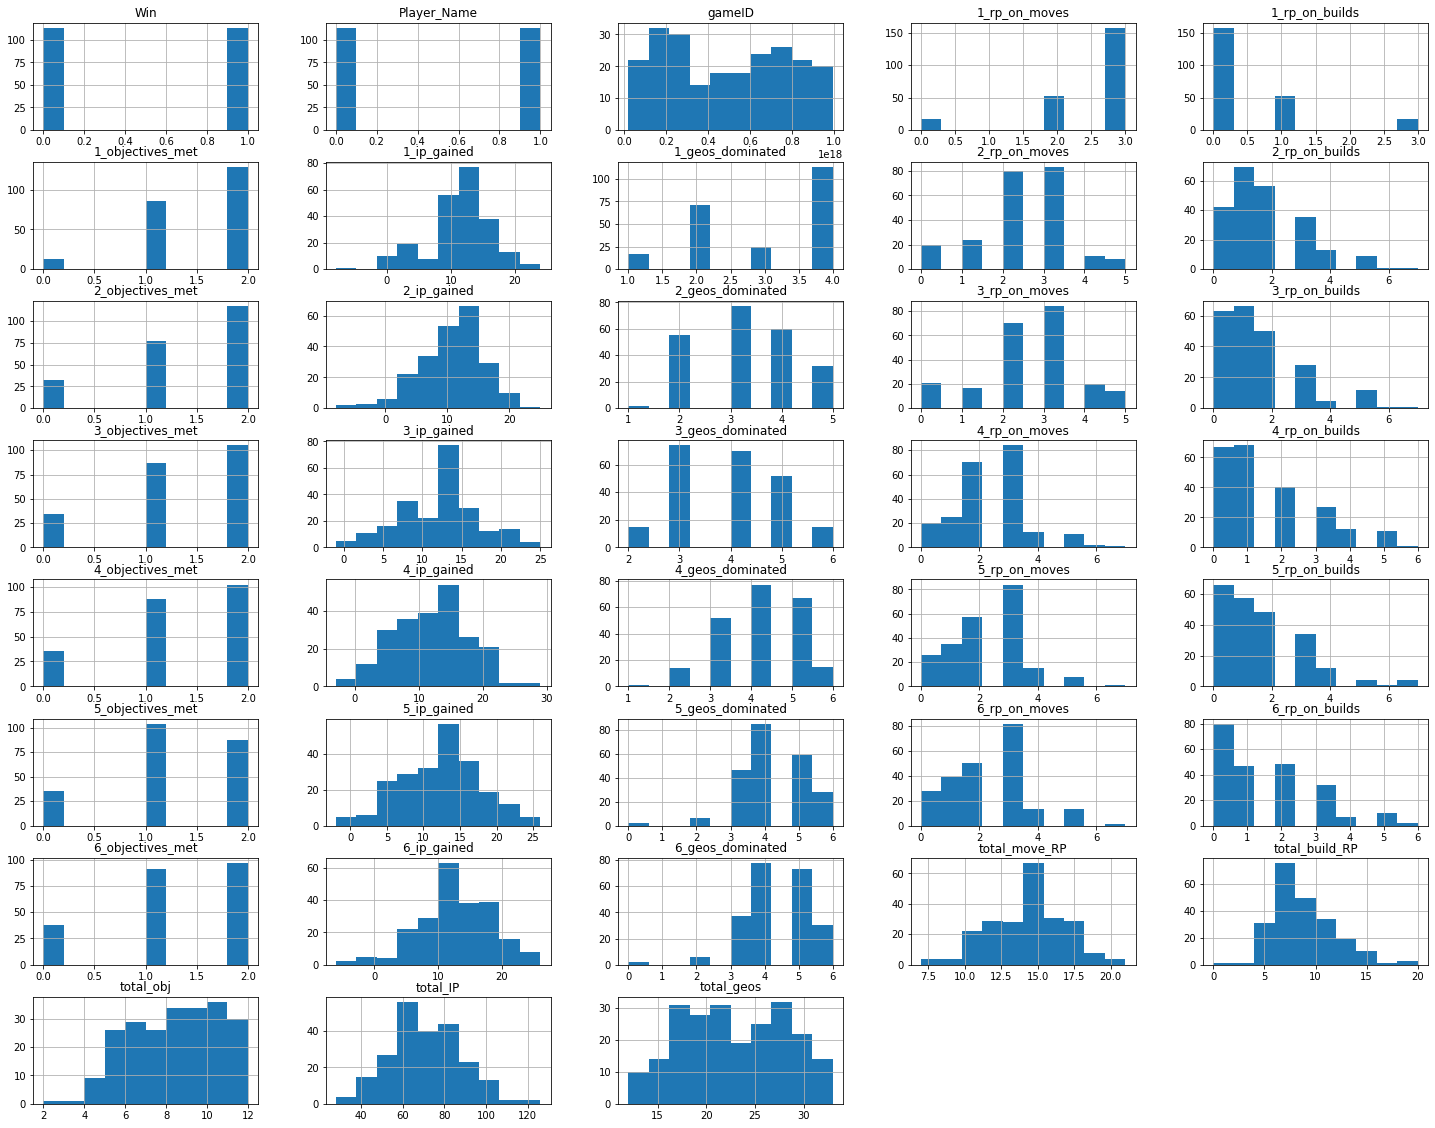

In [175]:

colors = ['blue', 'green']
_ = df.hist(layout=(10,5), figsize=(25,25))  #stops it from printing the object by assining it to a garbo variable
#X_train.hist( layout=(10,5), figsize=(25,25))



```
# This is formatted as code
```

# Format for ML Ingestion


# Model Creation (Pipeline)